In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install mlbox==0.8.5

     |████████████████████████████████| 20.2MB 203kB/s 
     |████████████████████████████████| 13.0MB 149kB/s 
     |████████████████████████████████| 1.9MB 47.0MB/s 
     |████████████████████████████████| 10.4MB 26.3MB/s 
     |████████████████████████████████| 296kB 39.8MB/s 
     |████████████████████████████████| 7.0MB 20.6MB/s 
     |████████████████████████████████| 86.3MB 54kB/s 
     |████████████████████████████████| 1.2MB 19.3MB/s 
     |████████████████████████████████| 4.3MB 39.8MB/s 
     |████████████████████████████████| 112kB 44.5MB/s 
     |████████████████████████████████| 1.7MB 36.8MB/s 
     |████████████████████████████████| 450kB 39.7MB/s 
     |████████████████████████████████| 51kB 5.5MB/s 
     |████████████████████████████████| 3.8MB 26.5MB/s 
  Created wheel for mlbox: filename=mlbox-0.8.5-cp37-none-any.whl size=43754 sha256=a7fff54b2133d6299daa3c8aa48c4241b04b6b2f0b2ab00a2e2ee6948c2b8e4b
  Stored in directory: /root/.cache/pip/wheels/45/71/0e/b72acfbcdaaf1

In [ ]:
# from mlbox.preprocessing import *
# from mlbox.optimisation import *
# from mlbox.prediction import *
# import mlbox
from mlbox.preprocessing import Reader
from mlbox.preprocessing import Drift_thresholder
from mlbox.optimisation import Optimiser
from mlbox.prediction import Predictor
# import pandas as pd

In [ ]:
#for Housing regression price
# train_path = '/content/drive/MyDrive/dataset/kaggle/advanced_housing_regression/train.csv'
# test_path = '/content/drive/MyDrive/dataset/kaggle/advanced_housing_regression/test.csv'
# paths = [train_path,test_path ] #actual
# target_name = "SalePrice"

#for Credit Card
# train_path = '/content/drive/MyDrive/dataset/kaggle/credit_card/UCI_Credit_Card_train.csv'
# test_path = '/content/drive/MyDrive/dataset/kaggle/credit_card/UCI_Credit_Card_test.csv'
# paths = [train_path,test_path ] #actual
# target_name = "default.payment.next.month"


train_path = '/content/drive/MyDrive/dataset/Sample_Data_03/dataset_03_with_header_train.csv'
test_path = '/content/drive/MyDrive/dataset/Sample_Data_03/dataset_03_with_header_test.csv'
paths = [train_path,test_path ] #actual
target_name = "y"


In [ ]:
import pandas as pd
df1 = pd.read_csv(train_path)
df2 = pd.read_csv(test_path)

df1.fillna(0, inplace = True)
df1.to_csv('/content/drive/MyDrive/dataset/Sample_Data_03/dataset_03_with_header_train_fillnaed.csv')
df1

df2.fillna(0, inplace = True)
df2.to_csv('/content/drive/MyDrive/dataset/Sample_Data_03/dataset_03_with_header_test_fillnaed.csv')

train_path = '/content/drive/MyDrive/dataset/Sample_Data_03/dataset_03_with_header_train_fillnaed.csv'
test_path = '/content/drive/MyDrive/dataset/Sample_Data_03/dataset_03_with_header_test_fillnaed.csv'

df2


,Unnamed: 0,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,x011,x012,x013,x014,x015,x016,x017,x018,x019,x020,x021,x022,x023,x024,x025,x026,x027,x028,x029,x030,x031,x032,x033,x034,x035,x036,x037,x038,x039,...,x266,x267,x268,x269,x270,x271,x272,x273,x274,x275,x276,x277,x278,x279,x280,x281,x282,x283,x284,x285,x286,x287,x288,x289,x290,x291,x292,x293,x294,x295,x296,x297,x298,x299,x300,x301,x302,x303,x304,y
0,90000,883561,0.0,0.0,0.0,58.0,0,0,0,0,0,4,0,0,0,4,0,4,2,0,1,0,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0000,0,0,0,0.0204,132,132,0.0204,0,0,0,0,0,0,0,0,0,0,0,5.0,0.0,0.0,0.0000,0,0,0.0000,0,0.0000,0,0.0000,0,0,0,1,5.0,0,0.0000,487
1,90001,883297,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0000,0,0,0,0.0000,0,0,0.0000,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0000,0,0,0.0000,0,0.0000,0,0.0000,0,0,0,0,0.0,0,0.0000,505
2,90002,1063945,4.0,4.0,4.0,116.0,1,1,1,2,0,0,0,0,1,4,1,3,3,1,3,0,2,0,1,0,1,1,0,1,2,5,0,0,4,4,2,0,0,1,...,4.0,4.0,0.9703,1,1,1,0.6176,20901,0,0.0000,0,0,0,20901,0,20901,1,1,1,1,0,1.0,4.0,4.0,4.0000,20901,20901,0.9703,0,0.0000,20901,0.9703,1,1,1,0,0.0,0,0.0000,725
3,90003,1214266,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,1,...,0.0,0.0,0.0000,0,0,0,0.0000,0,0,0.0000,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0000,0,0,0.0000,0,0.0000,0,0.0000,0,0,0,0,0.0,0,0.0000,501
4,90004,1091955,50.0,50.0,50.0,50.0,0,0,0,0,0,1,0,0,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,2,0,0,2,2,1,0,0,1,...,50.0,50.0,0.1067,1,1,1,0.1067,1410,0,0.0000,0,0,0,1410,0,1410,1,1,1,1,0,1.0,50.0,50.0,50.0000,1410,1410,0.1067,0,0.0000,1410,0.1067,1,1,1,0,0.0,0,0.0000,587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,99995,1573467,200.0,3.0,157.0,200.0,1,3,3,0,0,0,1,0,12,16,5,11,4,2,2,0,1,0,14,0,1,1,0,4,2,7,0,1,3,4,6,0,1,2,...,3.0,3.0,0.9166,1,1,1,0.3308,37362,0,0.0000,0,0,0,30960,0,30960,1,1,1,5,0,5.0,200.0,3.0,157.4000,30960,30960,1.2621,0,0.0000,30960,1.2621,1,1,1,1,5.0,20277,1.5749,578
9996,99996,1653422,292.0,80.0,159.0,292.0,1,1,1,1,2,0,4,3,6,17,4,13,5,3,13,1,3,1,2,1,1,1,1,2,8,2,0,0,1,2,2,0,0,1,...,80.0,80.0,0.0000,0,0,1,0.0872,36379,0,0.0000,0,0,0,36379,0,36379,1,1,1,1,0,1.0,80.0,80.0,80.0000,0,31202,0.0000,0,0.0000,0,0.0000,0,0,1,0,0.0,0,0.0000,835
9997,99997,1284669,35.0,4.0,26.0,57.0,0,1,1,5,10,4,0,0,0,20,8,12,6,4,11,3,3,1,9,0,1,1,0,2,9,17,0,1,7,8,9,0,1,3,...,30.0,31.5,0.3940,1,1,1,0.4824,31058,27971,0.7732,7,7,7,20507,20237,270,1,1,1,5,5,5.0,33.0,15.0,27.3999,13100,13100,0.5592,13100,0.5592,0,0.0000,1,1,1,0,0.0,0,0.0000,425
9998,99998,1434877,4.0,3.0,3.0,4.0,0,2,2,0,0,0,0,0,0,2,2,0,2,2,2,2,2,2,0,0,0,1,0,0,1,7,0,2,6,6,6,0,2,5,...,0.0,0.0,0.0000,0,0,0,1.1650,699,378,1.2600,1,1,1,699,378,321,1,1,1,0,0,0.0,0.0,0.0,0.0000,0,0,0.0000,0,0.0000,0,0.0000,0,0,0,0,0.0,0,0.0000,398


In [ ]:
rd = Reader(sep=',')
# Return a dictionnary containing three entries
# dict["train"] contains training samples withtout target columns
# dict["test"] contains testing elements withtout target columns
# dict["target"] contains target columns for training samples.
data = rd.train_test_split(paths, target_name)

dft = Drift_thresholder()
data = dft.fit_transform(data)


reading csv : dataset_03_with_header_train.csv ...
cleaning data ...
CPU time: 20.406578063964844 seconds

reading csv : dataset_03_with_header_test.csv ...
cleaning data ...
CPU time: 2.324070692062378 seconds

You have no test dataset !

> Number of common features : 304

gathering and crunching for train and test datasets ...
reindexing for train and test datasets ...
dropping training duplicates ...
dropping constant variables on training set ...

> Number of categorical features: 0
> Number of numerical features: 300
> Number of training samples : 100000
> Number of test samples : 0

> Top sparse features (% missing values on train set):
x242    93.3
x295    86.5
x304    81.9
x098    80.7
x155    79.1
dtype: float64

> Task : regression
count    100000.000000
mean        619.198230
std         118.461932
min         300.000000
25%         524.000000
50%         599.000000
75%         720.000000
max         839.000000
Name: y, dtype: float64

You have no test dataset...


In [ ]:
opt = Optimiser(scoring='accuracy', n_folds=3)
opt.evaluate(None, data)

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:74: UserWarning: Optimiser will save all your fitted models into directory 'save/joblib'. Please clear it regularly.
  +str(self.to_path)+"/joblib'. Please clear it regularly.")


No parameters set. Default configuration is tested

##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}


MEAN SCORE : accuracy = -inf
VARIANCE : nan (fold 1 = -inf, fold 2 = -inf, fold 3 = -inf)
CPU time: 36.76301574707031 seconds



/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:441: UserWarning: An error occurred while computing the cross validation mean score. Please check that the parameter values are correct and that your scoring function is valid and appropriate to the task.
  warnings.warn("An error occurred while computing the cross "
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


-inf

In [ ]:
space = {'ne__numerical_strategy': {"search": "choice", "space": [0]},
         'ce__strategy': {"search": "choice",
                          "space": ["label_encoding",
                                    "random_projection",
                                    "entity_embedding"]},
         'fs__threshold': {"search": "uniform",
                           "space": [0.01, 0.3]},
         'est__max_depth': {"search": "choice",
                            "space": [3, 4, 5, 6, 7]}

         }

# Optimises hyper-parameters of the whole Pipeline with a given scoring
# function. Algorithm used to optimize : Tree Parzen Estimator.
#
# IMPORTANT : Try to avoid dependent parameters and to set one feature
# selection strategy and one estimator strategy at a time.
best = opt.optimise(space, data, 15)



##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'random_projection'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.2486578615650148}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 4, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
  0%|          | 0/15 [00:00<?, ?trial/s, best loss=?]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164909147.59404975, tolerance: 93287.1368339784
  positive)



MEAN SCORE : accuracy = -inf
VARIANCE : nan (fold 1 = -inf, fold 2 = -inf, fold 3 = -inf)
CPU time: 48.2007577419281 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'random_projection'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.19553223300825756}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 4, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
  7%|▋         | 1/15 [00:48<11:14, 48.21s/

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:441: UserWarning: An error occurred while computing the cross validation mean score. Please check that the parameter values are correct and that your scoring function is valid and appropriate to the task.
  warnings.warn("An error occurred while computing the cross "

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164909147.59404975, tolerance: 93287.1368339784
  positive)



MEAN SCORE : accuracy = -inf
VARIANCE : nan (fold 1 = -inf, fold 2 = -inf, fold 3 = -inf)
CPU time: 48.07478928565979 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'random_projection'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.2775228999221713}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 7, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
 13%|█▎        | 2/15 [01:36<10:26, 48.17s/

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:441: UserWarning: An error occurred while computing the cross validation mean score. Please check that the parameter values are correct and that your scoring function is valid and appropriate to the task.
  warnings.warn("An error occurred while computing the cross "

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164909147.59404975, tolerance: 93287.1368339784
  positive)



MEAN SCORE : accuracy = -inf
VARIANCE : nan (fold 1 = -inf, fold 2 = -inf, fold 3 = -inf)
CPU time: 59.847856283187866 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'random_projection'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.03926021403984078}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 3, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
 20%|██        | 3/15 [02:36<10:20, 51.68

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:441: UserWarning: An error occurred while computing the cross validation mean score. Please check that the parameter values are correct and that your scoring function is valid and appropriate to the task.
  warnings.warn("An error occurred while computing the cross "

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164909147.59404975, tolerance: 93287.1368339784
  positive)



MEAN SCORE : accuracy = -inf
VARIANCE : nan (fold 1 = -inf, fold 2 = -inf, fold 3 = -inf)
CPU time: 43.391637325286865 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.14261061478504478}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 7, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
 27%|██▋       | 4/15 [03:19<09:01, 49.20s/t

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:441: UserWarning: An error occurred while computing the cross validation mean score. Please check that the parameter values are correct and that your scoring function is valid and appropriate to the task.
  warnings.warn("An error occurred while computing the cross "

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164909147.59404975, tolerance: 93287.1368339784
  positive)



MEAN SCORE : accuracy = -inf
VARIANCE : nan (fold 1 = -inf, fold 2 = -inf, fold 3 = -inf)
CPU time: 60.936848402023315 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.15865076896803448}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 3, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
 33%|███▎      | 5/15 [04:20<08:47, 52.73s/t

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:441: UserWarning: An error occurred while computing the cross validation mean score. Please check that the parameter values are correct and that your scoring function is valid and appropriate to the task.
  warnings.warn("An error occurred while computing the cross "

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164909147.59404975, tolerance: 93287.1368339784
  positive)



MEAN SCORE : accuracy = -inf
VARIANCE : nan (fold 1 = -inf, fold 2 = -inf, fold 3 = -inf)
CPU time: 43.53529715538025 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'random_projection'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.2039163734752001}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 5, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
 40%|████      | 6/15 [05:04<07:29, 49.98s/

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:441: UserWarning: An error occurred while computing the cross validation mean score. Please check that the parameter values are correct and that your scoring function is valid and appropriate to the task.
  warnings.warn("An error occurred while computing the cross "

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164909147.59404975, tolerance: 93287.1368339784
  positive)



MEAN SCORE : accuracy = -inf
VARIANCE : nan (fold 1 = -inf, fold 2 = -inf, fold 3 = -inf)
CPU time: 53.72337579727173 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'random_projection'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.18764620788079056}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 7, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
 47%|████▋     | 7/15 [05:57<06:48, 51.10s

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:441: UserWarning: An error occurred while computing the cross validation mean score. Please check that the parameter values are correct and that your scoring function is valid and appropriate to the task.
  warnings.warn("An error occurred while computing the cross "

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164909147.59404975, tolerance: 93287.1368339784
  positive)



MEAN SCORE : accuracy = -inf
VARIANCE : nan (fold 1 = -inf, fold 2 = -inf, fold 3 = -inf)
CPU time: 59.53952097892761 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'random_projection'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.18352349679429988}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 3, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
 53%|█████▎    | 8/15 [06:57<06:15, 53.64s

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:441: UserWarning: An error occurred while computing the cross validation mean score. Please check that the parameter values are correct and that your scoring function is valid and appropriate to the task.
  warnings.warn("An error occurred while computing the cross "

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164909147.59404975, tolerance: 93287.1368339784
  positive)



MEAN SCORE : accuracy = -inf
VARIANCE : nan (fold 1 = -inf, fold 2 = -inf, fold 3 = -inf)
CPU time: 44.30951189994812 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.21246879102901717}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 4, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
 60%|██████    | 9/15 [07:41<05:05, 50.84s/tr

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:441: UserWarning: An error occurred while computing the cross validation mean score. Please check that the parameter values are correct and that your scoring function is valid and appropriate to the task.
  warnings.warn("An error occurred while computing the cross "

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164909147.59404975, tolerance: 93287.1368339784
  positive)



MEAN SCORE : accuracy = -inf
VARIANCE : nan (fold 1 = -inf, fold 2 = -inf, fold 3 = -inf)
CPU time: 48.30839991569519 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'entity_embedding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.17027650902777536}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 7, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
 67%|██████▋   | 10/15 [08:30<04:10, 50.09s

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:441: UserWarning: An error occurred while computing the cross validation mean score. Please check that the parameter values are correct and that your scoring function is valid and appropriate to the task.
  warnings.warn("An error occurred while computing the cross "

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:315: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])

/usr/local/lib/py

MEAN SCORE : accuracy = -inf
VARIANCE : nan (fold 1 = -inf, fold 2 = -inf, fold 3 = -inf)
CPU time: 68.0978684425354 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'entity_embedding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.211787057045121}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 3, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
 73%|███████▎  | 11/15 [09:38<03:41, 55.49s/tr

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:441: UserWarning: An error occurred while computing the cross validation mean score. Please check that the parameter values are correct and that your scoring function is valid and appropriate to the task.
  warnings.warn("An error occurred while computing the cross "

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164909147.59404975, tolerance: 93287.1368339784
  positive)

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:315: UserWarning: Persisting input arguments took 0.78s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reas

MEAN SCORE : accuracy = -inf
VARIANCE : nan (fold 1 = -inf, fold 2 = -inf, fold 3 = -inf)
CPU time: 47.9622688293457 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'entity_embedding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.27124356986784964}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 6, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
 80%|████████  | 12/15 [10:26<02:39, 53.24s/

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:441: UserWarning: An error occurred while computing the cross validation mean score. Please check that the parameter values are correct and that your scoring function is valid and appropriate to the task.
  warnings.warn("An error occurred while computing the cross "

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164909147.59404975, tolerance: 93287.1368339784
  positive)

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:315: UserWarning: Persisting input arguments took 0.76s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reas

MEAN SCORE : accuracy = -inf
VARIANCE : nan (fold 1 = -inf, fold 2 = -inf, fold 3 = -inf)
CPU time: 62.17027807235718 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.09660480318915134}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 6, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
 87%|████████▋ | 13/15 [11:28<01:51, 55.92s/t

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:441: UserWarning: An error occurred while computing the cross validation mean score. Please check that the parameter values are correct and that your scoring function is valid and appropriate to the task.
  warnings.warn("An error occurred while computing the cross "

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164909147.59404975, tolerance: 93287.1368339784
  positive)



MEAN SCORE : accuracy = -inf
VARIANCE : nan (fold 1 = -inf, fold 2 = -inf, fold 3 = -inf)
CPU time: 57.73117756843567 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'random_projection'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.015188930989567818}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 6, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
 93%|█████████▎| 14/15 [12:26<00:56, 56.4

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:441: UserWarning: An error occurred while computing the cross validation mean score. Please check that the parameter values are correct and that your scoring function is valid and appropriate to the task.
  warnings.warn("An error occurred while computing the cross "

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164909147.59404975, tolerance: 93287.1368339784
  positive)



MEAN SCORE : accuracy = -inf
VARIANCE : nan (fold 1 = -inf, fold 2 = -inf, fold 3 = -inf)
CPU time: 57.67656087875366 seconds
100%|██████████| 15/15 [13:23<00:00, 53.58s/trial, best loss: inf]


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ BEST HYPER-PARAMETERS ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

{'ce__strategy': 'random_projection', 'est__max_depth': 4, 'fs__threshold': 0.2486578615650148, 'ne__numerical_strategy': 0}


/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:441: UserWarning: An error occurred while computing the cross validation mean score. Please check that the parameter values are correct and that your scoring function is valid and appropriate to the task.
  warnings.warn("An error occurred while computing the cross "

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)




fitting the pipeline ...


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 220885137.6436383, tolerance: 140330.88954867117
  positive)


CPU time: 78.33524918556213 seconds


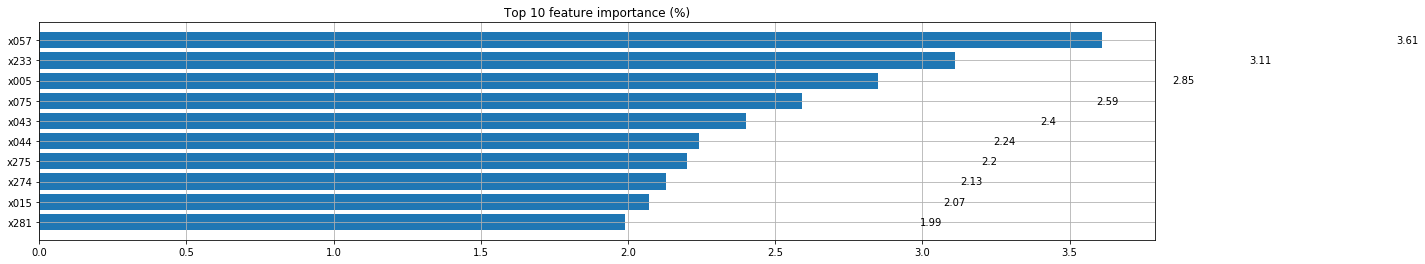


> Feature importances dumped into directory : save


/usr/local/lib/python3.7/dist-packages/mlbox/prediction/predictor.py:405: UserWarning: You have no test dataset. Cannot predict !
  warnings.warn("You have no test dataset. Cannot predict !")


In [ ]:
prd = Predictor()
prd.fit_predict(best, data)

